

# **데이터 전처리**

Found 1280 files belonging to 2 classes.
Using 1152 files for training.
Found 1280 files belonging to 2 classes.
Using 128 files for validation.
훈련 데이터셋: 72
검증 데이터셋: 8


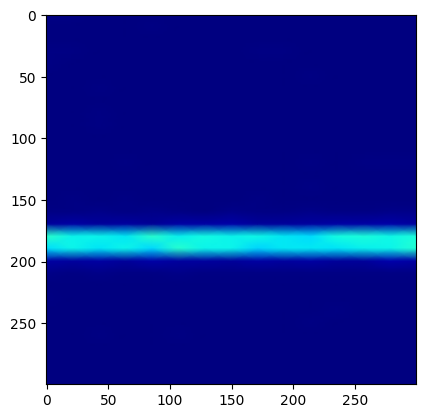

이미지 배열 형태: (300, 300, 3)
첫 번째 이미지의 배열 값:


In [4]:
import tensorflow as tf

# 원본 디렉토리에서 훈련 및 검증 데이터셋 나누기
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ivms/image/',
    image_size=(300,300),
    batch_size=16,
    validation_split=0.1,
    subset='training',
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ivms/image/',
    image_size=(300,300),
    batch_size=16,
    validation_split=0.1,
    subset='validation',
    seed=42
)


print("훈련 데이터셋:", train_ds.cardinality().numpy())
print("검증 데이터셋:", val_ds.cardinality().numpy())

import matplotlib.pyplot as plt


for i, 정답 in train_ds.take(1):
  # print(i.shape)
  # print(i)
  #print(정답)
  # 첫 번째 이미지 선택
  first_image = i[0].numpy().astype('uint8')
  plt.imshow(first_image)
  plt.show()

  # 이미지 배열 확인
  print("이미지 배열 형태:", first_image.shape)
  print("첫 번째 이미지의 배열 값:")
  #print(first_image[150,:, :])


# **학습 시각화**


In [5]:
def visualize_training(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(acc))

  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Train Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Train Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

  plt.show()

# **Transfer**

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 10, 10, 2048)        │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 10, 2048)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 4,467,713 (17.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - accuracy: 0.9216 - loss: 0.2035 - val_accuracy: 0.9297 - val_loss: 0.2903 - learning_rate: 0.0010
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.9966 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 3.9801e-04 - learning_rate: 0.0010
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.9857 - loss: 0.0320 - val_accuracy: 0.9922 - val_loss: 0.0218 - learning_rate: 0.0010
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.9925 - loss: 0.0163 - val_accuracy: 0.9922 - val_loss: 0.0180 - learning_rate: 0.0010
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.9982 - loss: 0.0049 - val_accuracy: 0.9922 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 222ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 2.6500e-04 - learning_rate: 0.0010
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9955 - l

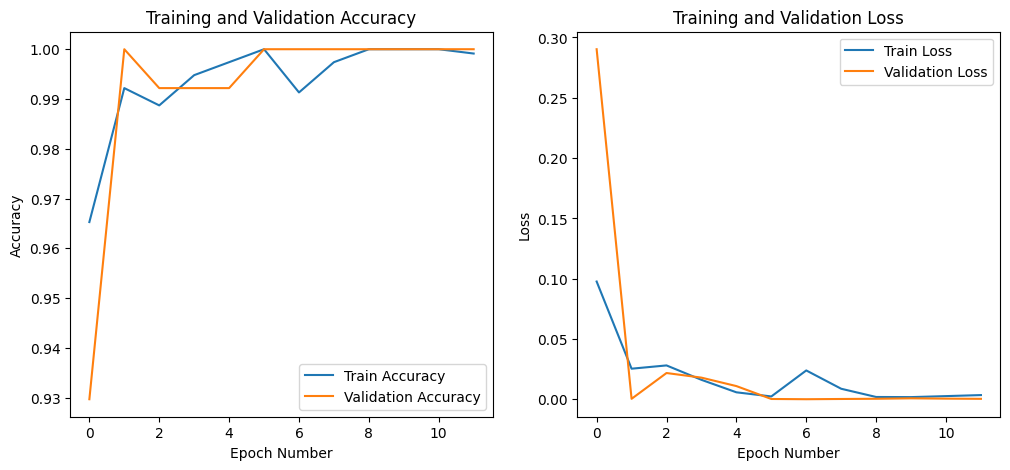

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 데이터 증강 레이어 정의
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.1),  # 대비 조절
    tf.keras.layers.RandomBrightness(0.1),  # 밝기 조절
])

# 기본 모델 설정
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# 입력 레이어 정의
inputs = Input(shape=(300, 300, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(1, activation='sigmoid')(x)

# 모델 빌드
cnn_model = Model(inputs, outputs)

# ResNet50의 일부 레이어를 동결 (기본 학습 가중치 사용)
for layer in base_model.layers[:-10]:
  layer.trainable = False

# 모델 요약
cnn_model.summary()

# 모델 컴파일
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 콜백 설정
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/ivms/model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_lr=0.00001, verbose=1)

# 모델 학습
history = cnn_model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stopping, model_checkpoint, reduce_lr])

# 학습 결과 시각화
visualize_training(history)

# 모델 저장
#model.save('/content/drive/MyDrive/ivms/resnet_model.keras')


# **테스트**

Found 128 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
len = 16
i = 0, pred = 1.0
prediction =  [1.]
label =  normal
i = 1, pred = 1.0
prediction =  [1.]
label =  normal
i = 2, pred = 1.0058111001853831e-06
prediction =  [1.0058111e-06]
label =  abnormal
i = 3, pred = 9.634206626918385e-11
prediction =  [9.6342066e-11]
label =  abnormal
i = 4, pred = 8.382524356420618e-06
prediction =  [8.382524e-06]
label =  abnormal
i = 5, pred = 1.0
prediction =  [1.]
label =  normal
i = 6, pred = 1.0
prediction =  [1.]
label =  normal
i = 7, pred = 2.0858205971308053e-06
prediction =  [2.0858206e-06]
label =  abnormal
i = 8, pred = 1.4420959359995322e-07
prediction =  [1.442096e-07]
label =  abnormal
i = 9, pred = 4.349411053539143e-09
prediction =  [4.349411e-09]
label =  abnormal
i = 10, pred = 1.0
prediction =  [1.]
label =  normal
i = 11, pred = 1.0
prediction =  [1.]
label =  normal
i = 12, pred = 1.0
prediction =  [1.]
label =  normal
i = 13, pred = 0.0013032914139330387


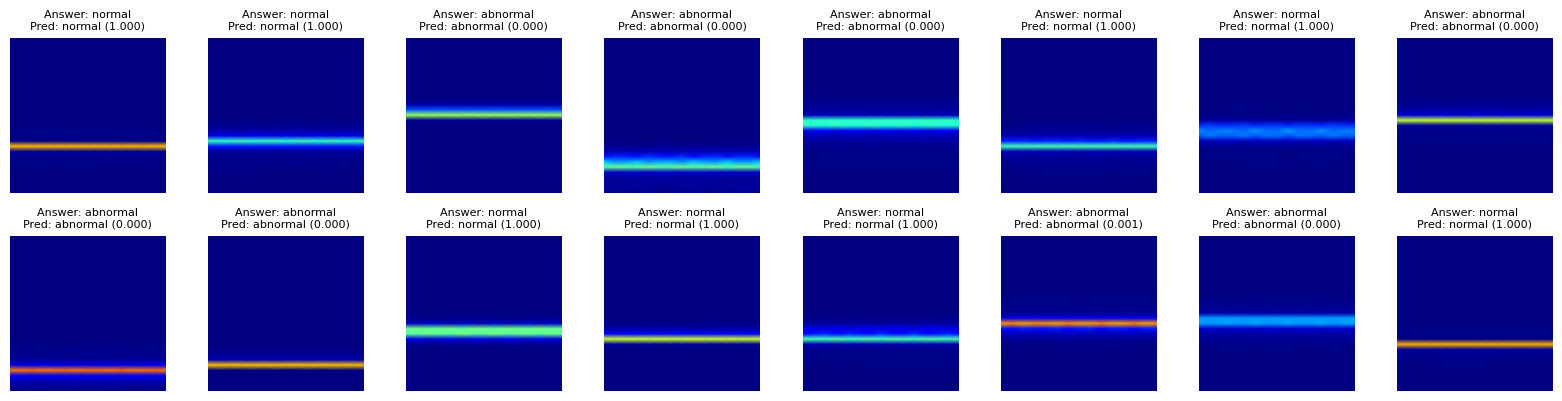

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
len = 16
i = 0, pred = 0.9999997615814209
prediction =  [0.99999976]
label =  normal
i = 1, pred = 1.1092415180824489e-10
prediction =  [1.1092415e-10]
label =  abnormal
i = 2, pred = 1.0
prediction =  [1.]
label =  normal
i = 3, pred = 1.0
prediction =  [1.]
label =  normal
i = 4, pred = 1.2214989020264966e-08
prediction =  [1.2214989e-08]
label =  abnormal
i = 5, pred = 3.287026900666845e-11
prediction =  [3.287027e-11]
label =  abnormal
i = 6, pred = 1.0
prediction =  [1.]
label =  normal
i = 7, pred = 1.0
prediction =  [1.]
label =  normal
i = 8, pred = 1.0
prediction =  [1.]
label =  normal
i = 9, pred = 0.9999988079071045
prediction =  [0.9999988]
label =  normal
i = 10, pred = 1.0
prediction =  [1.]
label =  normal
i = 11, pred = 1.0
prediction =  [1.]
label =  normal
i = 12, pred = 2.5114274470271723e-14
prediction =  [2.5114274e-14]
label =  abnormal
i = 13, pred = 1.0
prediction =  [1.]
label =  normal
i = 14, pred = 1.0
prediction =  [1.

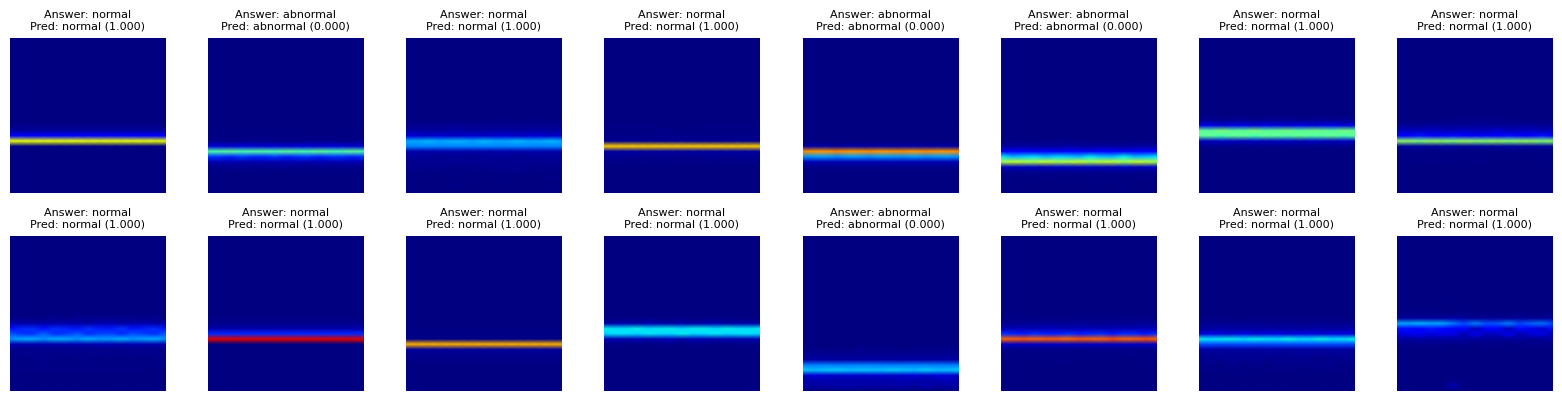

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
len = 16
i = 0, pred = 0.0006723028491251171
prediction =  [0.0006723]
label =  abnormal
i = 1, pred = 9.29737953292431e-11
prediction =  [9.2973795e-11]
label =  abnormal
i = 2, pred = 2.423869438494819e-10
prediction =  [2.4238694e-10]
label =  abnormal
i = 3, pred = 6.890695652961298e-11
prediction =  [6.8906957e-11]
label =  abnormal
i = 4, pred = 4.0751610974609775e-09
prediction =  [4.075161e-09]
label =  abnormal
i = 5, pred = 1.0
prediction =  [1.]
label =  normal
i = 6, pred = 1.0
prediction =  [1.]
label =  normal
i = 7, pred = 1.3102121165786684e-08
prediction =  [1.3102121e-08]
label =  abnormal
i = 8, pred = 1.0
prediction =  [1.]
label =  normal
i = 9, pred = 1.0
prediction =  [1.]
label =  normal
i = 10, pred = 1.1443030767735451e-12
prediction =  [1.1443031e-12]
label =  abnormal
i = 11, pred = 1.0
prediction =  [1.]
label =  normal
i = 12, pred = 1.0
prediction =  [1.]
label =  normal
i = 13, pred = 1.0
prediction =  [1.]
label =  

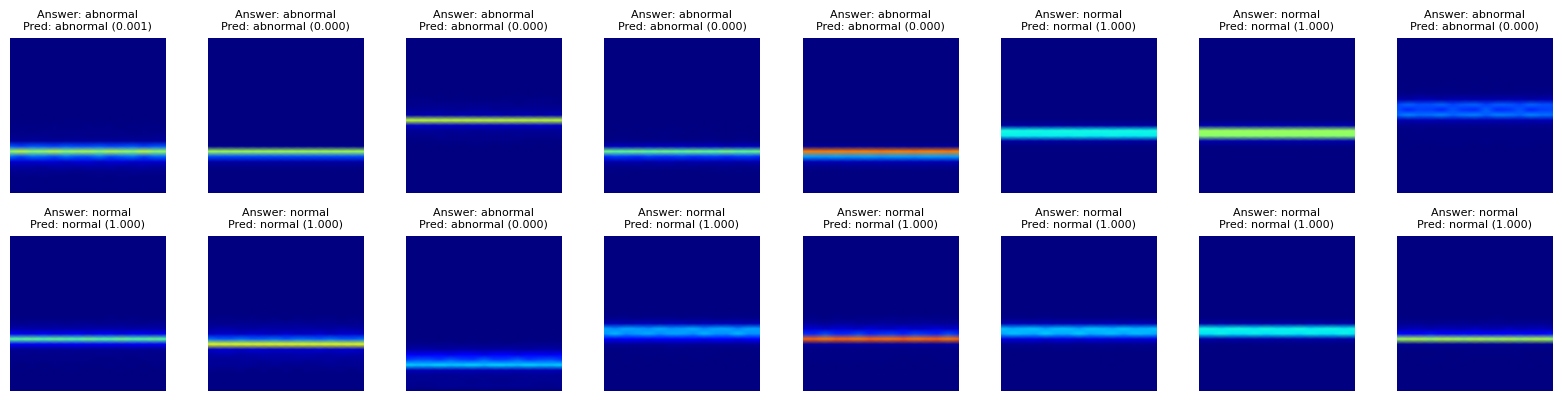

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
len = 16
i = 0, pred = 1.0
prediction =  [1.]
label =  normal
i = 1, pred = 1.0
prediction =  [1.]
label =  normal
i = 2, pred = 1.0
prediction =  [1.]
label =  normal
i = 3, pred = 4.370610644233164e-12
prediction =  [4.3706106e-12]
label =  abnormal
i = 4, pred = 3.48066367394928e-11
prediction =  [3.4806637e-11]
label =  abnormal
i = 5, pred = 1.0
prediction =  [1.]
label =  normal
i = 6, pred = 1.0
prediction =  [1.]
label =  normal
i = 7, pred = 1.0
prediction =  [1.]
label =  normal
i = 8, pred = 1.0
prediction =  [1.]
label =  normal
i = 9, pred = 1.0
prediction =  [1.]
label =  normal
i = 10, pred = 1.0
prediction =  [1.]
label =  normal
i = 11, pred = 0.9999997615814209
prediction =  [0.99999976]
label =  normal
i = 12, pred = 1.0
prediction =  [1.]
label =  normal
i = 13, pred = 1.0
prediction =  [1.]
label =  normal
i = 14, pred = 1.0
prediction =  [1.]
label =  normal
i = 15, pred = 0.9999998807907104
prediction =  [0.9999999]
label =  

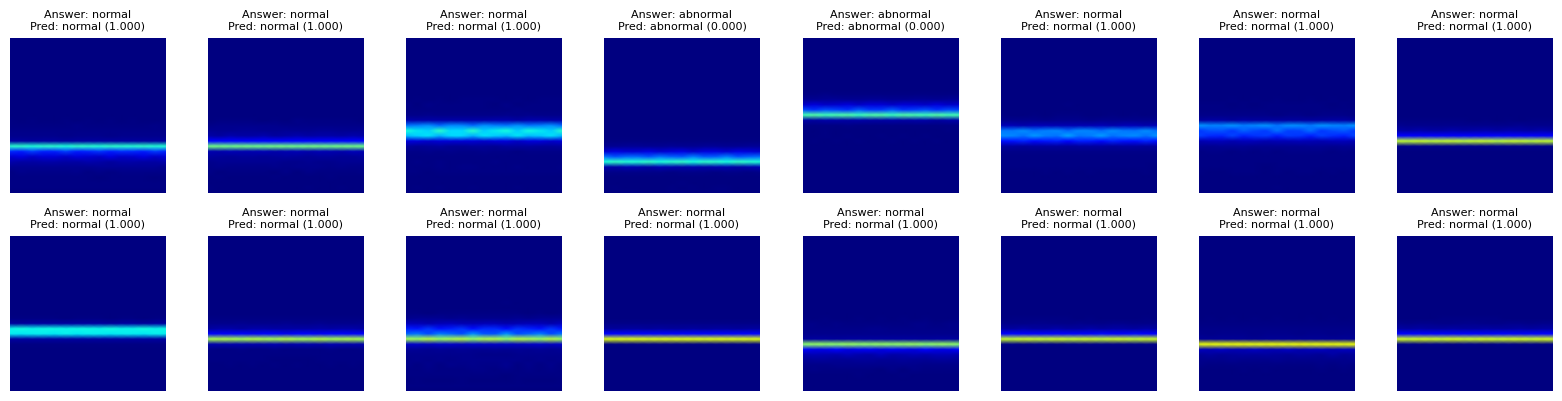

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
len = 16
i = 0, pred = 3.066787817619654e-14
prediction =  [3.0667878e-14]
label =  abnormal
i = 1, pred = 1.0
prediction =  [1.]
label =  normal
i = 2, pred = 1.0333643662985281e-11
prediction =  [1.0333644e-11]
label =  abnormal
i = 3, pred = 1.4581413410041932e-08
prediction =  [1.4581413e-08]
label =  abnormal
i = 4, pred = 1.0
prediction =  [1.]
label =  normal
i = 5, pred = 1.0
prediction =  [1.]
label =  normal
i = 6, pred = 2.1542862979617716e-12
prediction =  [2.1542863e-12]
label =  abnormal
i = 7, pred = 1.0
prediction =  [1.]
label =  normal
i = 8, pred = 2.0859638425463345e-06
prediction =  [2.0859638e-06]
label =  abnormal
i = 9, pred = 1.0
prediction =  [1.]
label =  normal
i = 10, pred = 1.0
prediction =  [1.]
label =  normal
i = 11, pred = 0.9999997615814209
prediction =  [0.99999976]
label =  normal
i = 12, pred = 1.0
prediction =  [1.]
label =  normal
i = 13, pred = 2.0809298462154402e-07
prediction =  [2.0809298e-07]
label =  ab

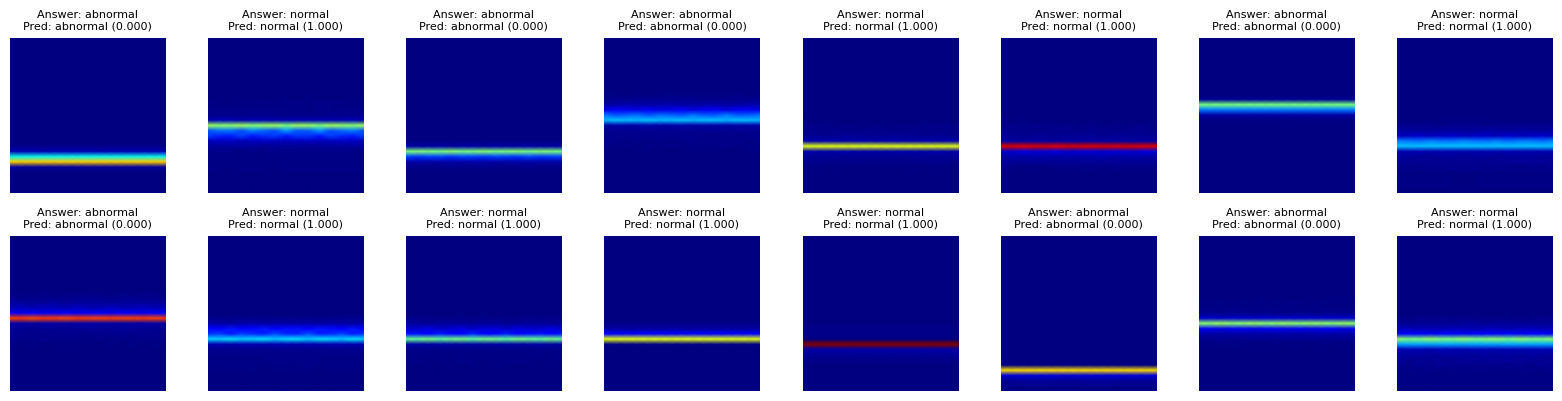

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
len = 16
i = 0, pred = 1.0
prediction =  [1.]
label =  normal
i = 1, pred = 1.0
prediction =  [1.]
label =  normal
i = 2, pred = 1.0
prediction =  [1.]
label =  normal
i = 3, pred = 1.0
prediction =  [1.]
label =  normal
i = 4, pred = 1.2480442990181473e-07
prediction =  [1.2480443e-07]
label =  abnormal
i = 5, pred = 0.9999998807907104
prediction =  [0.9999999]
label =  normal
i = 6, pred = 3.0191096844767173e-10
prediction =  [3.0191097e-10]
label =  abnormal
i = 7, pred = 1.0
prediction =  [1.]
label =  normal
i = 8, pred = 4.21383447246626e-06
prediction =  [4.2138345e-06]
label =  abnormal
i = 9, pred = 9.467310269073437e-11
prediction =  [9.46731e-11]
label =  abnormal
i = 10, pred = 1.0
prediction =  [1.]
label =  normal
i = 11, pred = 3.3094038371928036e-06
prediction =  [3.3094038e-06]
label =  abnormal
i = 12, pred = 2.774670049277006e-09
prediction =  [2.77467e-09]
label =  abnormal
i = 13, pred = 1.0
prediction =  [1.]
label =  normal
i

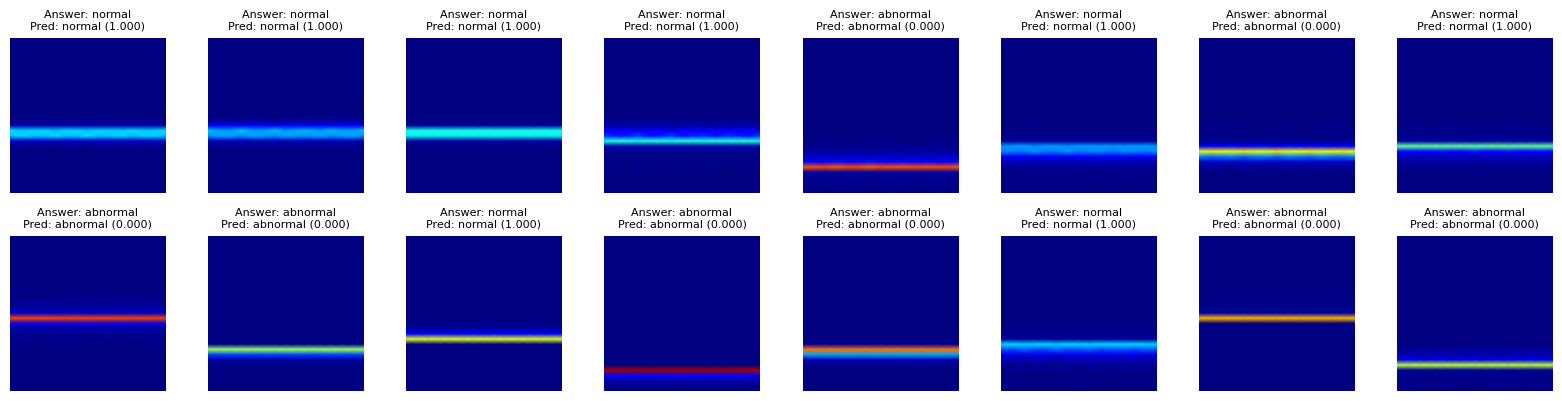

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
len = 16
i = 0, pred = 1.5057403240925638e-11
prediction =  [1.5057403e-11]
label =  abnormal
i = 1, pred = 1.0347245734010357e-05
prediction =  [1.0347246e-05]
label =  abnormal
i = 2, pred = 1.0
prediction =  [1.]
label =  normal
i = 3, pred = 0.00011817439371952787
prediction =  [0.00011817]
label =  abnormal
i = 4, pred = 0.9999998807907104
prediction =  [0.9999999]
label =  normal
i = 5, pred = 1.9603222156661104e-08
prediction =  [1.9603222e-08]
label =  abnormal
i = 6, pred = 0.9999961853027344
prediction =  [0.9999962]
label =  normal
i = 7, pred = 2.0126901034700495e-08
prediction =  [2.0126901e-08]
label =  abnormal
i = 8, pred = 1.0
prediction =  [1.]
label =  normal
i = 9, pred = 1.0
prediction =  [1.]
label =  normal
i = 10, pred = 1.0
prediction =  [1.]
label =  normal
i = 11, pred = 1.0
prediction =  [1.]
label =  normal
i = 12, pred = 1.0
prediction =  [1.]
label =  normal
i = 13, pred = 1.9779391611986913e-13
prediction =  [1.97793

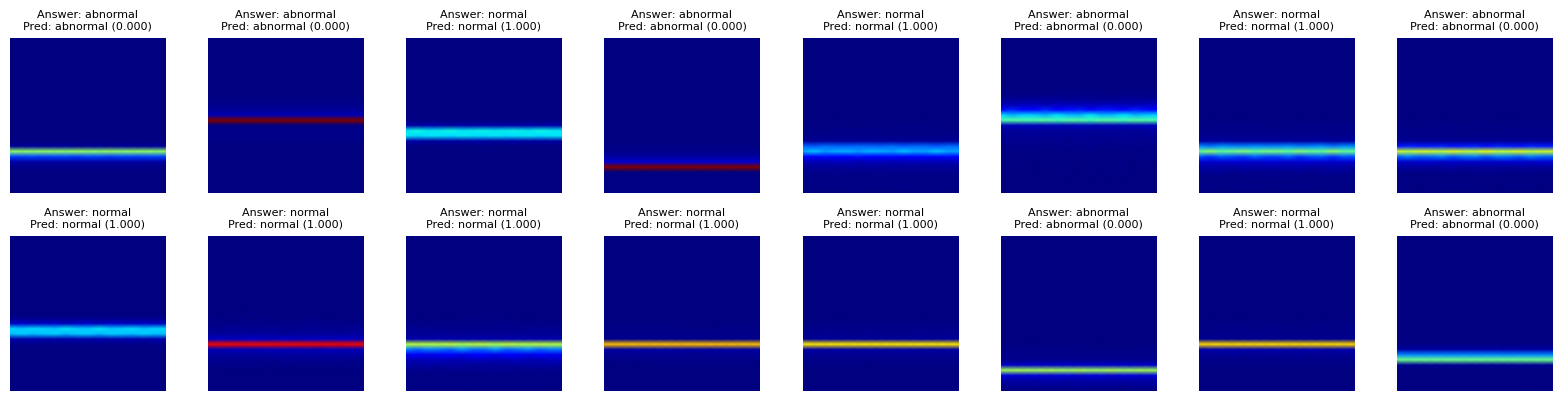

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
len = 16
i = 0, pred = 4.505038191382482e-07
prediction =  [4.5050382e-07]
label =  abnormal
i = 1, pred = 1.4348938703889758e-09
prediction =  [1.4348939e-09]
label =  abnormal
i = 2, pred = 1.0396928110112391e-11
prediction =  [1.0396928e-11]
label =  abnormal
i = 3, pred = 1.383693426504351e-08
prediction =  [1.3836934e-08]
label =  abnormal
i = 4, pred = 1.0
prediction =  [1.]
label =  normal
i = 5, pred = 0.000728090584743768
prediction =  [0.00072809]
label =  abnormal
i = 6, pred = 1.0
prediction =  [1.]
label =  normal
i = 7, pred = 1.5059262430811016e-12
prediction =  [1.5059262e-12]
label =  abnormal
i = 8, pred = 1.0
prediction =  [1.]
label =  normal
i = 9, pred = 1.0
prediction =  [1.]
label =  normal
i = 10, pred = 1.0
prediction =  [1.]
label =  normal
i = 11, pred = 1.0
prediction =  [1.]
label =  normal
i = 12, pred = 0.9983331561088562
prediction =  [0.99833316]
label =  normal
i = 13, pred = 5.999849861382245e-08
prediction =  [5

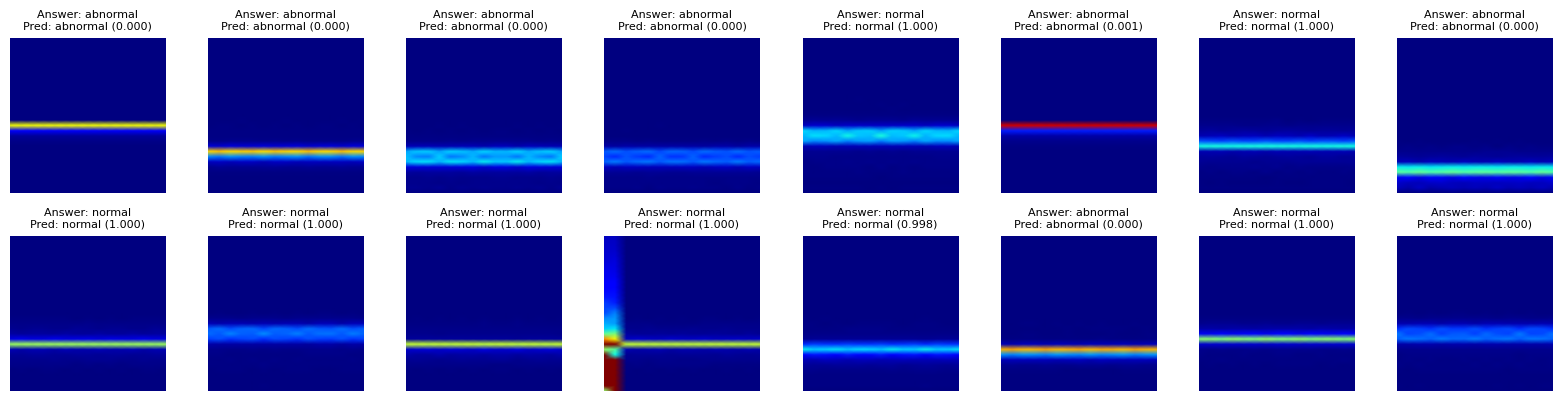

all_predictions = [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
all_labels = [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
정확도: 100.00%


In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ivms/test_image/',
    image_size=(300,300),
    batch_size=16,
    seed=42
)

학습된모델 = tf.keras.models.load_model('/content/drive/MyDrive/ivms/cnn_model.keras')

# 클래스 이름 리스트 (필요한 경우 클래스 수에 맞게 수정)
class_names = ['abnormal', 'normal']  # 실제 클래스 이름으로 수정


all_predictions = []
all_labels = []

# 테스트 데이터셋에서 배치 가져오기
for images, labels in test_ds:  # 모든 배치를 순회
    #print(f'images = {images}')

    predictions = 학습된모델.predict(images)  # 예측값 계산
    print(f'len = {len(predictions)}')
    plt.figure(figsize=(16, 16))
    for i in range(len(images)):
        ax = plt.subplot(8, 8, i + 1)  # 8x8 그리드에 이미지 배치
        plt.imshow(images[i].numpy().astype("uint8"))  # 이미지 출력
        true_label = class_names[labels[i].numpy()]  # 실제 라벨
        print(f'i = {i}, pred = {predictions[i][0]}')
        print("prediction = ", predictions[i])
        print("label = ", true_label)

        predicted_label = class_names[int(round(predictions[i][0]))]  # 예측된 확률 0 또는 1로 반올림
        all_predictions.append(int(round(predictions[i][0])))
        all_labels.append(labels[i].numpy())

        if true_label == predicted_label:
            plt.title(f"Answer: {true_label}\nPred: {predicted_label} ({predictions[i][0]:.3f})", fontsize=8)  # 타이틀 출력
        else:
            plt.title(f"Answer: {true_label}\nPred: {predicted_label} ({predictions[i][0]:.3f})\nDiff", fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()





print(f'all_predictions = {all_predictions}')
print(f'all_labels = {all_labels}')

accuracy = np.mean(np.array(all_predictions) == np.array(all_labels))
print(f'정확도: {accuracy * 100:.2f}%')